# Dataset Exploration and Initial Analysis

# 1. Data Preperation for Exploration

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import random
import seaborn as sns

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
#location of the files
fileloc=r'C:/Users/Deniz/Desktop/TezDrive/Thesis/Coding'
#fileloc=r'C:/Users/Deniz/Desktop/TezDrive/Thesis/DataFiles/BaseData'


## 1.1 Data Reading

In [4]:
#read files from excel
RentalData=pd.read_excel(fileloc+'/RentwithBuurtcode.xlsx',na_values='.',header=0)
#df2017=pd.read_excel(fileloc+'/kwb-2017.xls',na_values='.', header=0) #108 column
CBS17=pd.read_excel(fileloc+'/CBS17.xlsx',na_values='.', header=0) #108 column
CBS16=pd.read_excel(fileloc+'/CBS16.xlsx',na_values='.', header=0) #109 column


In [5]:
#checking the shapes of the files
print('Rent Data', RentalData.shape)
print('CBS 2017 Data', CBS17.shape)
print('CBS 2016 Data', CBS16.shape)

Rent Data (2300, 15)
CBS 2017 Data (480, 82)
CBS 2016 Data (479, 105)


In [6]:
#check data
print(RentalData[RentalData.Site=='Paraius'].shape)
print(RentalData[RentalData.Site=='ExpatRental'].shape)

set(RentalData.Site) #no more perfecthousing, all dropped due to non assignment of location

(1238, 15)
(1062, 15)


{'ExpatRental', 'Paraius'}

In [7]:
#drop if no data is present in a column
CBS17.dropna(axis=1,how='all',inplace=True)
CBS16.dropna(axis=1,how='all',inplace=True)
print('CBS 2017 Data', CBS17.shape)
print('CBS 2016 Data', CBS16.shape)

CBS 2017 Data (480, 82)
CBS 2016 Data (479, 105)


## 1.2 Basic Data Exploration

In [8]:
RentalData[RentalData.Site=='ExpatRental']

AdName Zipcode                  Area  \
1238        Daniël Stalpertstraat     NaN        Stadsdeel Zuid   
1239         Tweede Helmersstraat     NaN        Stadsdeel West   
1240         Tweede Helmersstraat     NaN        Stadsdeel West   
1241           William Barlowlaan     NaN        Stadsdeel Oost   
1242           William Barlowlaan     NaN        Stadsdeel Oost   
1243                   Kerkstraat     NaN     Stadsdeel Centrum   
1244        Koopvaardersplantsoen     NaN                   NaN   
1245   P. Hans Frankfurthersingel     NaN  Stadsdeel Nieuw-West   
1246           Haringpakkerssteeg     NaN     Stadsdeel Centrum   
1247                Joubertstraat     NaN        Stadsdeel Oost   
1248                Warmoesstraat     NaN        Stadsdeel Zuid   
1249                  IJdoornlaan     NaN       Stadsdeel Noord   
1250                   De Klencke     NaN        Stadsdeel Zuid   
1251                   IJburglaan     NaN        Stadsdeel Oost   
1252              Amstelveenseweg     NaN        Stadsdeel Zuid   
1253               Chestertonlaan     NaN     Stadsdeel Centrum   
1254               Windjammerdijk     NaN        Stadsdeel Oost   
1255            Leidsekruisstraat     NaN  Stadsdeel Nieuw-West   
1256      Gerrit van Den Boschpad     NaN    Stadsdeel Zuidoost   
1257                 Bijlmerdreef     NaN    Stadsdeel Zuidoost   
1258              Gibraltarstraat     NaN        Stadsdeel West   
1259                Rooseveltlaan     NaN        Stadsdeel Zuid   
1260                Bosrankstraat     NaN                   NaN   
1261             Wilhelminastraat     NaN        Stadsdeel West   
1262                   Herenmarkt     NaN     Stadsdeel Centrum   
1263                   Loenermark     NaN       Stadsdeel Noord   
1264                  Nieuwevaart     NaN     Stadsdeel Centrum   
1265                 Azaleastraat     NaN       Stadsdeel Noord   
1266                 Boeroestraat     NaN        Stadsdeel Oost   
1267                 Haparandaweg     NaN   Stadsdeel Westpoort   
...                           ...     ...                   ...   
2270            Esplanade de Meer     NaN                   NaN   
2271                Keizersgracht     NaN                   NaN   
2272           Haringpakkerssteeg     NaN     Stadsdeel Centrum   
2273              Jodenbreestraat     NaN     Stadsdeel Centrum   
2274                Houthavenkade     NaN                   NaN   
2275      Eerste Leliedwarsstraat     NaN        Stadsdeel Zuid   
2276              Amstelveenseweg     NaN                   NaN   
2277      Henriëtte Bosmansstraat     NaN        Stadsdeel Zuid   
2278                    Westerdok     NaN     Stadsdeel Centrum   
2279           Driekoningenstraat     NaN     Stadsdeel Centrum   
2280              Linnaeusparkweg     NaN        Stadsdeel Oost   
2281             Jisperveldstraat     NaN       Stadsdeel Noord   
2282        Willem de Zwijgerlaan     NaN        Stadsdeel West   
2283               Houtrijkstraat     NaN                   NaN   
2284  Burgemeester Tellegenstraat     NaN        Stadsdeel Zuid   
2285         Nieuwe Prinsengracht     NaN     Stadsdeel Centrum   
2286         Tweede Helmersstraat     NaN        Stadsdeel West   
2287           Tesselschadestraat     NaN        Stadsdeel West   
2288             Gerard Doustraat     NaN        Stadsdeel Zuid   
2289       Eerste Jan Steenstraat     NaN        Stadsdeel Zuid   
2290                       Singel     NaN     Stadsdeel Centrum   
2291                Keizersgracht     NaN     Stadsdeel Centrum   
2292                     Adamello     NaN  Stadsdeel Nieuw-West   
2293                 Bakkerstraat     NaN     Stadsdeel Centrum   
2294                  Leliegracht     NaN     Stadsdeel Centrum   
2295                  Kromme Waal     NaN     Stadsdeel Centrum   
2296                   Oosterpark     NaN        Stadsdeel Oost   
2297         Utrechtsedwarsstraat     NaN     Stadsdeel Centrum   
2298   

In [9]:
CBS17.columns

Index(['regioncode', 'regionnumber', 'region indication', 'municipal name',
       'type of region', 'encryption',
       'classification change neighborhoods and neighborhoods',
       'number of inhabitants', 'men', 'women', '0 to 14 years',
       '15 to 24 years', '25 to 44 years', '45 to 64 years',
       '65 years or older', 'unmarried', 'married', 'divorced', 'widowed',
       'western total', 'non-western total', 'morocco',
       'netherlands antilles and aruba', 'suriname', 'turkey',
       'other non-western', 'households total', 'single-person households',
       'households without children', 'households with children',
       'average household size', 'population density', 'housing stock',
       'average house value', 'percentage of single-family dwelling',
       'percentage of multi-family dwelling', 'percentage inhabited',
       'percentage uninhabited', 'owned by resident', 'rental housing total',
       'owned housing corporation', 'owned by other landlords',
     

In [10]:
CBS17.head()

regioncode  regionnumber region indication municipal name type of region  \
0  BU03630000     3630000.0       Kop Zeedijk      Amsterdam          Buurt   
1  BU03630001     3630001.0    Oude Kerk e.o.      Amsterdam          Buurt   
2  BU03630002     3630002.0   Burgwallen Oost      Amsterdam          Buurt   
3  BU03630003     3630003.0          Nes e.o.      Amsterdam          Buurt   
4  BU03630004     3630004.0   BG-terrein e.o.      Amsterdam          Buurt   

   encryption  classification change neighborhoods and neighborhoods  \
0  BU03630000                                                1.0       
1  BU03630001                                                1.0       
2  BU03630002                                                1.0       
3  BU03630003                                                1.0       
4  BU03630004                                                1.0       

   number of inhabitants    men  women         ...          dutch total  \
0                 1020.0  585.0  435.0         ...                545.0   
1                  660.0  365.0  295.0         ...                355.0   
2                 1580.0  840.0  735.0         ...                820.0   
3                  360.0  190.0  165.0         ...                205.0   
4                  615.0  345.0  265.0         ...                365.0   

   DistancetoCenter        newCLat        newCLon   realCLat  realCLon  \
0        927.195085  487673.403538  121841.593669  52.379100  4.901651   
1        533.065675  487437.347218  121559.387250  52.376589  4.897479   
2        569.633710  487327.918090  121735.381187  52.375425  4.900081   
3        142.500767  487112.361034  121391.621151  52.373132  4.894999   
4        284.275565  486964.639962  121517.896422  52.371560  4.896866   

   distance to gp practice;  distance to large supermarket  \
0                       0.3                            0.2   
1                       0.3                            0.3   
2                       0.2                            0.2   
3                       0.2                            0.4   
4                       0.2                            0.4   

   distance to nursery  distance to school  
0                  0.2                 0.4  
1                  0.3                 0.5  
2                  0.3                 0.4  
3                  0.4                 0.8  
4                  0.2                 0.7  

[5 rows x 82 columns]

In [11]:
RentalData.columns

Index(['AdName', 'Zipcode', 'Area', 'Description', 'Surface (m²)', 'Bedrooms',
       'Furniture', 'Price (€)', 'Monthly', 'encryption', 'Site', 'Lat', 'Lon',
       'newLat', 'newLon'],
      dtype='object')

In [12]:
#number of rental data scrapped with buurt codes assigned
len(RentalData.encryption) 

2300

In [13]:
#number of unique buurtcodes assigned
len(RentalData.encryption.unique()) #number of unique 

254

## 1.3 Outlier Treatment, Detection, Assesment and Removal

In [14]:
#number of rental house add for each neighbourhood
RentalData.groupby(['encryption'])['AdName'].count().describe()

count    253.000000
mean       8.992095
std       12.572644
min        1.000000
25%        3.000000
50%        5.000000
75%       10.000000
max      115.000000
Name: AdName, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


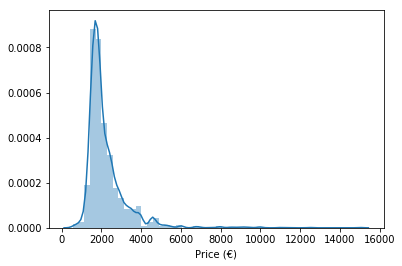

In [15]:
sns.distplot(RentalData['Price (€)']) 

In [16]:
RentalData[RentalData['Price (€)']>10000]

AdName  Zipcode               Area  \
1202               Bachstraat  1077 GD     Stadsdeel Zuid   
1426  Oudezijds Achterburgwal      NaN  Stadsdeel Centrum   
2041               Bachstraat      NaN     Stadsdeel Zuid   

                                            Description  Surface (m²)  \
1202  Unieke 12 meter brede Amsterdamse Stadsvilla, ...         380.0   
1426  FRIENDS CONCEPT POSSIBLE and ENGLISH TEXT BELO...           NaN   
2041  Unique 12m wide Amsterdam City villa, consisti...          50.0   

      Bedrooms    Furniture  Price (€) Monthly  encryption         Site  \
1202         6      unknown      12500   (ex.)  BU03634901      Paraius   
1426         9  Unfurnished      11000     NaN  BU03630004  ExpatRental   
2041         4  Unfurnished      15000     NaN  BU03634901  ExpatRental   

            Lat       Lon         newLat         newLon  
1202        NaN       NaN            NaN            NaN  
1426  52.371998  4.897133  487005.783364  121535.989299  
2041  52.349199  4.879755  484862.729916  120360.493338

In [17]:
RentalData=RentalData[RentalData['Price (€)']<14000]

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


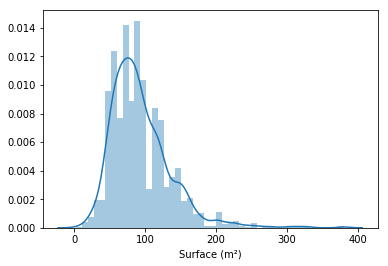

In [18]:
X=RentalData["Surface (m²)"].dropna(how='any')
sns.distplot(X) 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


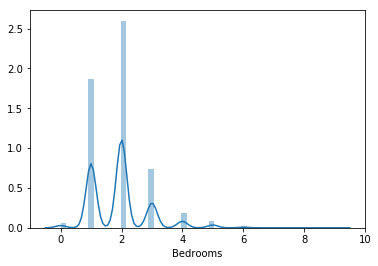

In [19]:
X=RentalData["Bedrooms"].dropna(how='any')
sns.distplot(X) 

In [20]:
RentalData["Price per m²"]=RentalData['Price (€)']/RentalData["Surface (m²)"]
RentalData["Price per number of bedrooms"]=RentalData['Price (€)']/(RentalData["Bedrooms"]+1)

In [21]:
RentalData[RentalData["Price per m²"]>0]["Price per m²"].describe()

count    1565.000000
mean       25.736697
std        16.366744
min         8.139535
25%        20.481928
50%        24.166667
75%        28.666667
max       565.000000
Name: Price per m², dtype: float64

In [22]:
#RentalData[((RentalData["Price per m²"]<90) & (RentalData["Price per m²"]>0))]["Price per m²"].describe()
RentalData["Price per m²"].describe()

count    1565.000000
mean       25.736697
std        16.366744
min         8.139535
25%        20.481928
50%        24.166667
75%        28.666667
max       565.000000
Name: Price per m², dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


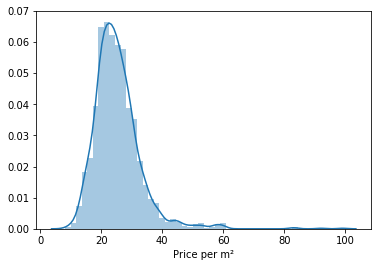

In [23]:
sns.distplot(RentalData[((RentalData["Price per m²"]<120) & (RentalData["Price per m²"]>0))]["Price per m²"]) 

In [24]:
import scipy
scipy.stats.normaltest(RentalData["Price per m²"])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1404: RuntimeWarning: invalid value encountered in less
  term2 = np.where(denom < 0, term1, np.power((1-2.0/A)/denom, 1/3.0))


NormaltestResult(statistic=nan, pvalue=nan)

In [25]:
#filter wrongly collected data, 
RentalData=RentalData[((RentalData['Price per m²']<120) & (RentalData['Price per m²']>0))]
RentalData=RentalData[((RentalData['Price per number of bedrooms']<2000) & (RentalData['Price per number of bedrooms']>0))]

In [26]:
RentalData.shape #almost 700 lost

(1552, 17)

In [27]:
RentalData.groupby(['Area'])['encryption'].count()

Area
Stadsdeel Centrum       536
Stadsdeel Nieuw-West     87
Stadsdeel Noord          37
Stadsdeel Oost          118
Stadsdeel West          206
Stadsdeel Westpoort       9
Stadsdeel Zuid          466
Stadsdeel Zuidoost       25
Name: encryption, dtype: int64

## 1.4 Aggregating Rental Data to neighbourhood codes

In [28]:
Rentgroup=RentalData.groupby(['encryption']).mean()
Rentgroup.reset_index(level=0, inplace=True)
Rentgroup.head()
Rentgroup.shape

(228, 10)

In [29]:
CBS17.shape

(480, 82)

## 1.5 Merging CBS Data into Rental data

In [30]:
DATA=pd.merge(RentalData,CBS17,  how='left',on='encryption')
DATA.shape

(1552, 98)

In [31]:
DATA

AdName  Zipcode                  Area  \
0     Van Tuyll van Serooskerkenplein  1076 NB        Stadsdeel Zuid   
1                     Beethovenstraat  1077 JN        Stadsdeel Zuid   
2                Titus van Rijnstraat  1058 GB  Stadsdeel Nieuw-West   
3                Titus van Rijnstraat  1058 GB  Stadsdeel Nieuw-West   
4                  Uiterwaardenstraat  1079 CN        Stadsdeel Zuid   
5                          De Klencke  1083 HH        Stadsdeel Zuid   
6                         IJselstraat  1078 CG        Stadsdeel Zuid   
7              Admiraal De Ruijterweg  1055 MX        Stadsdeel West   
8                       Rooseveltlaan  1078 NW        Stadsdeel Zuid   
9                       Keizersgracht  1016 EK     Stadsdeel Centrum   
10      Willem Frederik Hermansstraat  1011 DG     Stadsdeel Centrum   
11                       Vrolikstraat  1092 TR        Stadsdeel Oost   
12                         Nassaukade  1052 CT        Stadsdeel West   
13                       Marnixstraat  1016 TH     Stadsdeel Centrum   
14                         Kerkstraat  1017 GN     Stadsdeel Centrum   
15               Jacob van Lennepkade  1053 ML        Stadsdeel West   
16                      Haarlemmerweg  1051 NV        Stadsdeel West   
17                         Oosterpark  1092 AJ        Stadsdeel Oost   
18                 Oude Looiersstraat  1016 VK     Stadsdeel Centrum   
19             Admiraal De Ruijterweg  1055 NB        Stadsdeel West   
20                      Zeeburgerkade  1019 HR        Stadsdeel Oost   
21                     Windjammerdijk  1086 VC        Stadsdeel Oost   
22                    Biesboschstraat  1078 MK        Stadsdeel Zuid   
23                  Nieuwe Hoogstraat  1011 HC     Stadsdeel Centrum   
24                     Sarphatistraat  1018 EZ     Stadsdeel Centrum   
25                      Laurierstraat  1016 PJ     Stadsdeel Centrum   
26                        Grubbehoeve  1103 GZ    Stadsdeel Zuidoost   
27                     Wagenaarstraat  1093 CN        Stadsdeel Oost   
28                  Hugo de Grootkade  1052 LR        Stadsdeel West   
29           Koningin Wilhelminaplein  1062 HJ  Stadsdeel Nieuw-West   
...                               ...      ...                   ...   
1522     Johannes van der Waalsstraat      NaN        Stadsdeel Oost   
1523                Groenendaalstraat      NaN        Stadsdeel Zuid   
1524                    Barentszplein      NaN        Stadsdeel West   
1525                     Boeroestraat      NaN        Stadsdeel Oost   
1526                     Weesperzijde      NaN        Stadsdeel Oost   
1527                           Kospad      NaN  Stadsdeel Nieuw-West   
1528                Nieuwendammerdijk      NaN                   NaN   
1529                    Bellamystraat      NaN        Stadsdeel West   
1530                     Krooswijkhof      NaN        Stadsdeel Zuid   
1531                      Kromme Waal      NaN     Stadsdeel Centrum   
1532                 Landsmeerderdijk      NaN       Stadsdeel Noord   
1533                    Prinsengracht      NaN        Stadsdeel Zuid   
1534                 Van Nijenrodeweg      NaN        Stadsdeel Zuid   
1535                      Lomanstraat      NaN        Stadsdeel Zuid   
1536                 van Nijenrodeweg      NaN        Stadsdeel Zuid   
1537                 Van der Palmkade      NaN        Stadsdeel West   
1538                    Prinsengracht      NaN        Stadsdeel Zuid   
1539              Waldeck Pyrmontlaan      NaN        Stadsdeel Zuid   
1540               Nieuwe Herengracht      NaN     Stadsdeel Centrum   
1541                Gustav Mahlerlaan      NaN        Stadsdeel Zuid   
1542                    Warmoesstraat      NaN     Stadsdeel Centrum   
1543                            Rokin      NaN                   NaN   
1544                 J.J. Cremerplein      NaN        Stadsdeel West   
1545               Haringpakkerssteeg      NaN     Stadsdeel Centrum   

## 1.6 Preparing numerical values for missing data handling

In [32]:
DATA.columns.to_series().groupby(DATA.dtypes).groups

{dtype('int64'): Index(['Bedrooms', 'Price (€)'], dtype='object'),
 dtype('float64'): Index(['Surface (m²)', 'Lat', 'Lon', 'newLat', 'newLon', 'Price per m²',
        'Price per number of bedrooms', 'regionnumber',
        'classification change neighborhoods and neighborhoods',
        'number of inhabitants', 'men', 'women', '0 to 14 years',
        '15 to 24 years', '25 to 44 years', '45 to 64 years',
        '65 years or older', 'unmarried', 'married', 'divorced', 'widowed',
        'western total', 'non-western total', 'morocco',
        'netherlands antilles and aruba', 'suriname', 'turkey',
        'other non-western', 'households total', 'single-person households',
        'households without children', 'households with children',
        'average household size', 'population density', 'housing stock',
        'average house value', 'percentage of single-family dwelling',
        'percentage of multi-family dwelling', 'percentage inhabited',
        'percentage uninhabited', 'o

In [33]:
floatcolumns=['Surface (m²)', 'Lat', 'Lon', 'newLat', 'newLon', 'Price per m²',
        'Price per number of bedrooms', 'regionnumber',
        'classification change neighborhoods and neighborhoods',
        'number of inhabitants', 'men', 'women', '0 to 14 years',
        '15 to 24 years', '25 to 44 years', '45 to 64 years',
        '65 years or older', 'unmarried', 'married', 'divorced', 'widowed',
        'western total', 'non-western total', 'morocco',
        'netherlands antilles and aruba', 'suriname', 'turkey',
        'other non-western', 'households total', 'single-person households',
        'households without children', 'households with children',
        'average household size', 'population density', 'housing stock',
        'average house value', 'percentage of single-family dwelling',
        'percentage of multi-family dwelling', 'percentage inhabited',
        'percentage uninhabited', 'owned by resident', 'rental housing total',
        'owned housing corporation', 'owned by other landlords',
        'property unknown', 'year of construction before 2000',
        'year of construction after 2000',
        'persons per type of benefit; assistance',
        'persons by type of benefit; ao', 'persons by type of benefit; ww',
        'persons by type of benefit; aow', 'total business locations',
        'a agriculture forestry and fishing', 'b-f industry and energy',
        'g + i trade and catering',
        'h + j transport information and communication',
        'k-l financial services real estate', 'm-n business services',
        'r-u culture recreation other services', 'passenger cars total',
        'passenger cars; younger than 6 years',
        'passenger cars; 6 years and older', 'passenger cars; fuel gasoline',
        'passenger cars; other fuel', 'passenger cars per household',
        'passenger cars by surface', 'motorcycles', 'total area', 'land area',
        'surface water', 'most common zip code', 'coverage percentage',
        'degree of urbanity', 'environmental address density', 'dutch total',
        'DistancetoCenter', 'newCLat', 'newCLon', 'realCLat', 'realCLon',
        'distance to gp practice;', 'distance to large supermarket',
        'distance to nursery', 'distance to school']#bedrooms removed
intcolumns=['Bedrooms', 'Price (€)']
stringcolumns=['AdName', 'Zipcode', 'Area', 'Description', 'Furniture', 'Monthly',
        'encryption', 'Site', 'regioncode', 'region indication',
        'municipal name', 'type of region']

In [34]:
len(floatcolumns+intcolumns+stringcolumns)

98

In [35]:
flnintcolumns=floatcolumns
flnintcolumns

['Surface (m²)',
 'Lat',
 'Lon',
 'newLat',
 'newLon',
 'Price per m²',
 'Price per number of bedrooms',
 'regionnumber',
 'classification change neighborhoods and neighborhoods',
 'number of inhabitants',
 'men',
 'women',
 '0 to 14 years',
 '15 to 24 years',
 '25 to 44 years',
 '45 to 64 years',
 '65 years or older',
 'unmarried',
 'married',
 'divorced',
 'widowed',
 'western total',
 'non-western total',
 'morocco',
 'netherlands antilles and aruba',
 'suriname',
 'turkey',
 'other non-western',
 'households total',
 'single-person households',
 'households without children',
 'households with children',
 'average household size',
 'population density',
 'housing stock',
 'average house value',
 'percentage of single-family dwelling',
 'percentage of multi-family dwelling',
 'percentage inhabited',
 'percentage uninhabited',
 'owned by resident',
 'rental housing total',
 'owned housing corporation',
 'owned by other landlords',
 'property unknown',
 'year of construction before 20

In [36]:
datacol = DATA.columns.tolist()
datain= DATA.index.tolist()

In [37]:
columnstodrop=['regionnumber','type of region','classification change neighborhoods and neighborhoods','regioncode']
data=DATA.drop(columnstodrop,axis=1)
    

In [38]:
data.head()

AdName  Zipcode                  Area  \
0  Van Tuyll van Serooskerkenplein  1076 NB        Stadsdeel Zuid   
1                  Beethovenstraat  1077 JN        Stadsdeel Zuid   
2             Titus van Rijnstraat  1058 GB  Stadsdeel Nieuw-West   
3             Titus van Rijnstraat  1058 GB  Stadsdeel Nieuw-West   
4               Uiterwaardenstraat  1079 CN        Stadsdeel Zuid   

                                         Description  Surface (m²)  Bedrooms  \
0  Amazing, modern double floor apartment (140m2)...         140.0         3   
1  Newly renovated small studio for rent at a per...          18.0         1   
2  Stunning modern stylish 2 bedroom furnished ap...          85.0         2   
3  Stunning modern stylish 2 bedroom furnished ap...          85.0         2   
4  Uiterwaardenstraat, Amsterdam/ Rivierenbuurt (...          85.0         2   

                  Furniture  Price (€)  Monthly  encryption  \
0                 furnished       2995    (ex.)  BU03634801   
1                 furnished        900  (incl.)  BU03634903   
2                 furnished       1900    (ex.)  BU03638701   
3                 furnished       1900    (ex.)  BU03638701   
4  furnished or unfurnished       2200    (ex.)  BU03635203   

          ...         dutch total  DistancetoCenter        newCLat  \
0         ...               895.0       3424.008737  484645.504035   
1         ...               870.0       3022.583084  484775.016072   
2         ...               595.0       3733.564445  485463.245085   
3         ...               595.0       3733.564445  485463.245085   
4         ...              1595.0       3478.607035  484198.291218   

         newCLon   realCLat  realCLon  distance to gp practice;  \
0  119398.671911  52.346888  4.865536                       0.2   
1  119934.238357  52.348266  4.873453                       0.3   
2  118067.840647  52.355588  4.845861                       0.8   
3  118067.840647  52.355588  4.845861                       0.8   
4  122020.043356  52.342131  4.904289                       0.2   

  distance to large supermarket distance to nursery  distance to school  
0                           0.2                 0.2                 0.1  
1                           0.5                 0.2                 0.2  
2                           0.7                 0.2                 0.6  
3                           0.7                 0.2                 0.6  
4                           0.3                 0.1                 0.3  

[5 rows x 94 columns]

In [39]:
len(DATA.groupby(['region indication'])['regioncode'].count())


227

In [40]:
data=data[['Price (€)','Area','encryption','DistancetoCenter','region indication','Surface (m²)','Bedrooms']]

print(data.shape,DATA.shape)

(1552, 7) (1552, 98)


In [41]:
data.columns

Index(['Price (€)', 'Area', 'encryption', 'DistancetoCenter',
       'region indication', 'Surface (m²)', 'Bedrooms'],
      dtype='object')

In [42]:
DATA #final

AdName  Zipcode                  Area  \
0     Van Tuyll van Serooskerkenplein  1076 NB        Stadsdeel Zuid   
1                     Beethovenstraat  1077 JN        Stadsdeel Zuid   
2                Titus van Rijnstraat  1058 GB  Stadsdeel Nieuw-West   
3                Titus van Rijnstraat  1058 GB  Stadsdeel Nieuw-West   
4                  Uiterwaardenstraat  1079 CN        Stadsdeel Zuid   
5                          De Klencke  1083 HH        Stadsdeel Zuid   
6                         IJselstraat  1078 CG        Stadsdeel Zuid   
7              Admiraal De Ruijterweg  1055 MX        Stadsdeel West   
8                       Rooseveltlaan  1078 NW        Stadsdeel Zuid   
9                       Keizersgracht  1016 EK     Stadsdeel Centrum   
10      Willem Frederik Hermansstraat  1011 DG     Stadsdeel Centrum   
11                       Vrolikstraat  1092 TR        Stadsdeel Oost   
12                         Nassaukade  1052 CT        Stadsdeel West   
13                       Marnixstraat  1016 TH     Stadsdeel Centrum   
14                         Kerkstraat  1017 GN     Stadsdeel Centrum   
15               Jacob van Lennepkade  1053 ML        Stadsdeel West   
16                      Haarlemmerweg  1051 NV        Stadsdeel West   
17                         Oosterpark  1092 AJ        Stadsdeel Oost   
18                 Oude Looiersstraat  1016 VK     Stadsdeel Centrum   
19             Admiraal De Ruijterweg  1055 NB        Stadsdeel West   
20                      Zeeburgerkade  1019 HR        Stadsdeel Oost   
21                     Windjammerdijk  1086 VC        Stadsdeel Oost   
22                    Biesboschstraat  1078 MK        Stadsdeel Zuid   
23                  Nieuwe Hoogstraat  1011 HC     Stadsdeel Centrum   
24                     Sarphatistraat  1018 EZ     Stadsdeel Centrum   
25                      Laurierstraat  1016 PJ     Stadsdeel Centrum   
26                        Grubbehoeve  1103 GZ    Stadsdeel Zuidoost   
27                     Wagenaarstraat  1093 CN        Stadsdeel Oost   
28                  Hugo de Grootkade  1052 LR        Stadsdeel West   
29           Koningin Wilhelminaplein  1062 HJ  Stadsdeel Nieuw-West   
...                               ...      ...                   ...   
1522     Johannes van der Waalsstraat      NaN        Stadsdeel Oost   
1523                Groenendaalstraat      NaN        Stadsdeel Zuid   
1524                    Barentszplein      NaN        Stadsdeel West   
1525                     Boeroestraat      NaN        Stadsdeel Oost   
1526                     Weesperzijde      NaN        Stadsdeel Oost   
1527                           Kospad      NaN  Stadsdeel Nieuw-West   
1528                Nieuwendammerdijk      NaN                   NaN   
1529                    Bellamystraat      NaN        Stadsdeel West   
1530                     Krooswijkhof      NaN        Stadsdeel Zuid   
1531                      Kromme Waal      NaN     Stadsdeel Centrum   
1532                 Landsmeerderdijk      NaN       Stadsdeel Noord   
1533                    Prinsengracht      NaN        Stadsdeel Zuid   
1534                 Van Nijenrodeweg      NaN        Stadsdeel Zuid   
1535                      Lomanstraat      NaN        Stadsdeel Zuid   
1536                 van Nijenrodeweg      NaN        Stadsdeel Zuid   
1537                 Van der Palmkade      NaN        Stadsdeel West   
1538                    Prinsengracht      NaN        Stadsdeel Zuid   
1539              Waldeck Pyrmontlaan      NaN        Stadsdeel Zuid   
1540               Nieuwe Herengracht      NaN     Stadsdeel Centrum   
1541                Gustav Mahlerlaan      NaN        Stadsdeel Zuid   
1542                    Warmoesstraat      NaN     Stadsdeel Centrum   
1543                            Rokin      NaN                   NaN   
1544                 J.J. Cremerplein      NaN        Stadsdeel West   
1545               Haringpakkerssteeg      NaN     Stadsdeel Centrum   

## 1.7 Normalization of Parameters

In [43]:
DATA["Price per m²"]=DATA['Price (€)']/DATA["Surface (m²)"]
DATA["Price per number of bedrooms"]=DATA['Price (€)']/(DATA["Bedrooms"]+1)

In [44]:
DATA["Price per m²"]

0       21.392857
1       50.000000
2       22.352941
3       22.352941
4       25.882353
5       28.571429
6       20.000000
7       28.125000
8       22.105263
9       38.221154
10      28.235294
11      29.464286
12      24.647887
13      24.666667
14      25.000000
15      23.333333
16      20.000000
17      21.666667
18      19.642857
19      12.847222
20      17.727273
21      10.087912
22      25.000000
23      23.780488
24      19.928571
25      48.333333
26      18.656716
27      47.058824
28      33.695652
29      35.961538
          ...    
1522    25.373134
1523    30.000000
1524    20.555556
1525    24.375000
1526    18.888889
1527    15.000000
1528    17.377049
1529    22.222222
1530    20.454545
1531    19.500000
1532    16.000000
1533    24.553571
1534    20.000000
1535    22.012987
1536    21.052632
1537    22.222222
1538    33.333333
1539    27.722222
1540    24.937500
1541    23.802721
1542    19.879518
1543    30.727273
1544    56.428571
1545    16.071429
1546    14

# Exploration


In [45]:
#invite exploration libraries
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import seaborn as sns
import scipy


import warnings
#warnings.filterwarnings('ignore')
%matplotlib inline

In [46]:
#need to check infinte/missing values
DATA.isnull().values.any()

True

# 2. Univariate Analysis

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


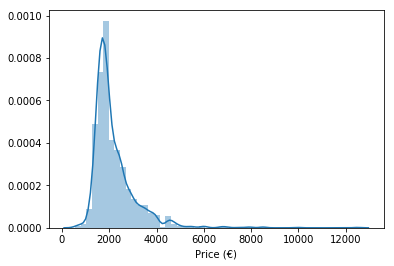

In [47]:
sns.distplot(DATA['Price (€)']) 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


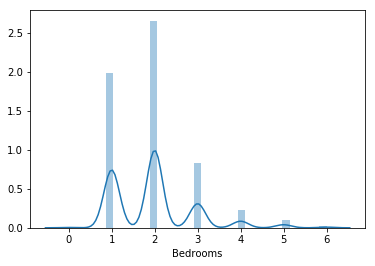

In [48]:
sns.distplot(DATA['Bedrooms']) 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


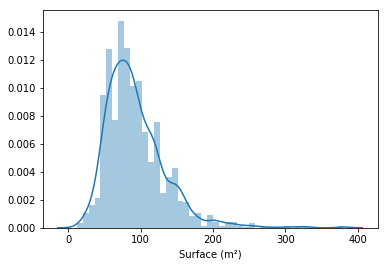

In [49]:
sns.distplot(RentalData['Surface (m²)']) 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


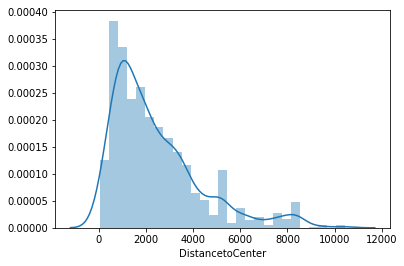

In [50]:
sns.distplot(DATA['DistancetoCenter'].dropna()) 

In [51]:
RentalData[RentalData['Price (€)']>6000]

AdName  Zipcode               Area  \
9               Keizersgracht  1016 EK  Stadsdeel Centrum   
95              Keizersgracht  1016 GA  Stadsdeel Centrum   
225               Leliegracht  1016 GR  Stadsdeel Centrum   
337             Prinsengracht  1015 DT  Stadsdeel Centrum   
370             Prinsengracht  1017 KA  Stadsdeel Centrum   
612              Vondelstraat  1054 GN     Stadsdeel West   
667         De Lairessestraat  1071 PJ     Stadsdeel Zuid   
1124           Valeriusstraat  1075 GD     Stadsdeel Zuid   
1199             Vondelstraat  1054 GT     Stadsdeel West   
1202               Bachstraat  1077 GD     Stadsdeel Zuid   
2277  Henriëtte Bosmansstraat      NaN     Stadsdeel Zuid   

                                            Description  Surface (m²)  \
9     Keizersgracht 405-III+IV, 1016 EK Amsterdam Un...         208.0   
95    Unique house on the canals (approximately 380m...         380.0   
225   Entire canal house with parking spot at the Le...         325.0   
337   A magnificent 5 room apartment of 280 m2 with ...         280.0   
370   In the Centre of Amsterdam we offer a beautifu...         200.0   
612   Beautiful extensively renovated (2016) yet cha...         270.0   
667   De Lairessestraat 96, 1071 PJ Amsterdam. Top o...         200.0   
1124  A recently renovated luxurious light 7 room ap...         200.0   
1199  Located in a fantastic location along the Vond...         320.0   
1202  Unieke 12 meter brede Amsterdamse Stadsvilla, ...         380.0   
2277  Completely renovated and semi-furnished family...         200.0   

      Bedrooms                 Furniture  Price (€) Monthly  encryption  \
9            3                 furnished       7950   (ex.)  BU03630303   
95           5                 furnished       8500   (ex.)  BU03630303   
225          4               unfurnished       7500   (ex.)  BU03630202   
337          4  furnished or unfurnished       8500   (ex.)  BU03630606   
370          5               unfurnished       6850   (ex.)  BU03630606   
612          6                   unknown       9950   (ex.)  BU03632200   
667          3               unfurnished       7900   (ex.)  BU03634703   
1124         4               unfurnished       7000   (ex.)  BU03634703   
1199         4               unfurnished       6750   (ex.)  BU03632200   
1202         6                   unknown      12500   (ex.)  BU03634901   
2277         6               Unfurnished       6750     NaN  BU03634905   

             Site        Lat      Lon         newLat        newLon  \
9         Paraius        NaN      NaN            NaN           NaN   
95        Paraius        NaN      NaN            NaN           NaN   
225       Paraius        NaN      NaN            NaN           NaN   
337       Paraius        NaN      NaN            NaN           NaN   
370       Paraius        NaN      NaN            NaN           NaN   
612       Paraius        NaN      NaN            NaN           NaN   
667       Paraius        NaN      NaN            NaN           NaN   
1124      Paraius        NaN      NaN            NaN           NaN   
1199      Paraius        NaN      NaN            NaN           NaN   
1202      Paraius        NaN      NaN            NaN           NaN   
2277  ExpatRental  52.342724  4.87054  484254.065362  119737.16926   

      Price per m²  Price per number of bedrooms  
9        38.221154                   1987.500000  
95       22.368421                   1416.666667  
225      23.076923                   1500.000000  
337      30.357143                   1700.000000  
370      34.250000                   1141.666667  
612      36.851852                   1421.428571  
667      39.500000                   1975.000000  
1124     35.000000                   1400.000000  
1199     21.093750                   1350.000000  
1202     32.894737                   1785.714286  
2277     33.750000                    964.285714

In [52]:
RentalData['Price (€)'].describe()


count     1552.000000
mean      2193.914304
std        931.287521
min        550.000000
25%       1650.000000
50%       1900.000000
75%       2500.000000
max      12500.000000
Name: Price (€), dtype: float64

## 3 MultiVariate Analysis

In [53]:
#Price per m²	Price per number of bedrooms

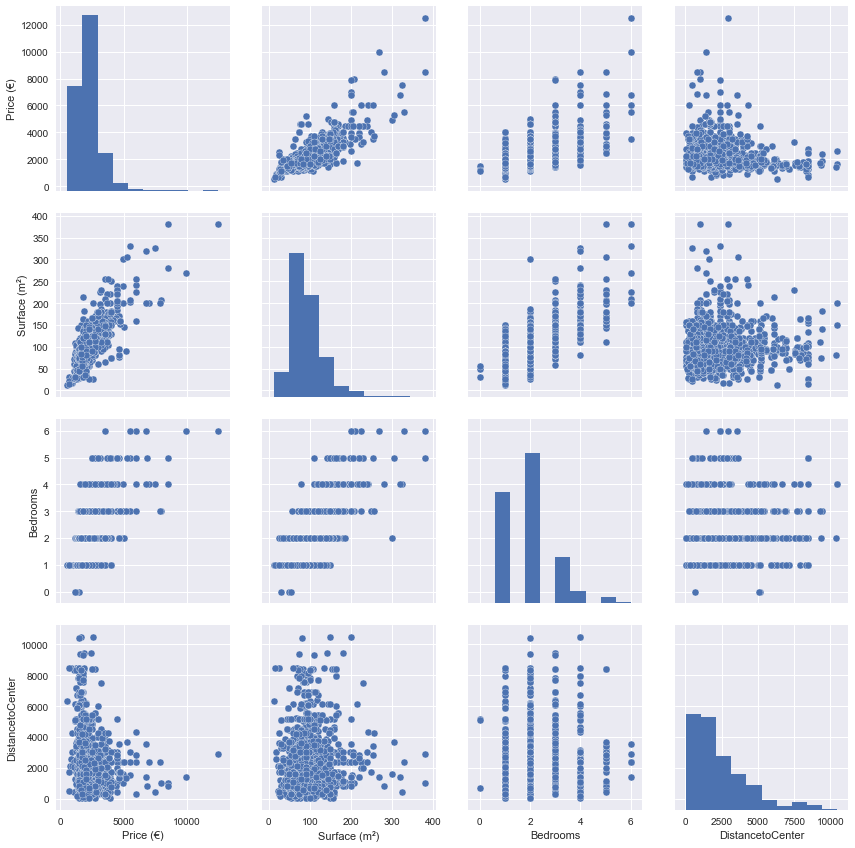

In [54]:
#correlation found between price and other 2 variable.
sns.set()
cols = ['Price (€)','Surface (m²)','Bedrooms','DistancetoCenter']#,'Price per number of bedrooms','Price per m²']
sns.pairplot(DATA[cols].dropna(), size = 3,dropna=True)
plt.show();

In [55]:
DATA.columns

Index(['AdName', 'Zipcode', 'Area', 'Description', 'Surface (m²)', 'Bedrooms',
       'Furniture', 'Price (€)', 'Monthly', 'encryption', 'Site', 'Lat', 'Lon',
       'newLat', 'newLon', 'Price per m²', 'Price per number of bedrooms',
       'regioncode', 'regionnumber', 'region indication', 'municipal name',
       'type of region',
       'classification change neighborhoods and neighborhoods',
       'number of inhabitants', 'men', 'women', '0 to 14 years',
       '15 to 24 years', '25 to 44 years', '45 to 64 years',
       '65 years or older', 'unmarried', 'married', 'divorced', 'widowed',
       'western total', 'non-western total', 'morocco',
       'netherlands antilles and aruba', 'suriname', 'turkey',
       'other non-western', 'households total', 'single-person households',
       'households without children', 'households with children',
       'average household size', 'population density', 'housing stock',
       'average house value', 'percentage of single-family dwelling

In [56]:
Correlationcol=['AdName', 'Zipcode', 'Area', 'Description',  'Monthly',
       'number of inhabitants', 
       'households total'
       
        'passenger cars total',
       'passenger cars; younger than 6 years',
       'passenger cars; 6 years and older', 'passenger cars; fuel gasoline',
       'passenger cars; other fuel', 'passenger cars per household',
       'passenger cars by surface', 'motorcycles', 
             'most common zip code', 'coverage percentage',
       'degree of urbanity', 'environmental address density', 
       'DistancetoCenter','distance to gp practice;', 'distance to large supermarket',
       'distance to nursery', 'distance to school']

var=['Surface (m²)', 'Bedrooms','Price (€)']

set1=[ 'morocco','netherlands antilles and aruba', 'suriname', 'turkey',
       'other non-western','number of inhabitants','western total', 'non-western total','dutch total']

set2=['number of inhabitants','men', 'women', '0 to 14 years','15 to 24 years', '25 to 44 years', '45 to 64 years',
       '65 years or older', 'unmarried', 'married', 'divorced', 'widowed']

set4=['rental housing total',
       'owned housing corporation', 'owned by other landlords',
       'property unknown', 'year of construction before 2000',
       'year of construction after 2000']

set5=['a agriculture forestry and fishing', 'b-f industry and energy',
       'g + i trade and catering',
       'h + j transport information and communication',
       'k-l financial services real estate', 'm-n business services',
       'r-u culture recreation other services','total business locations']
set6=['total area', 'land area',
       'surface water']


## 3.2 Extra Standardization/Normalization

In [57]:
DATAnorm=pd.DataFrame() #15
DATAnorm['Price (€)']=DATA['Price (€)']
DATAnorm['Bedrooms']=DATA['Bedrooms']
DATAnorm['Surface (m²)']=DATA['Surface (m²)']
DATAnorm['DistancetoCenter']=DATA['DistancetoCenter']
DATAnorm["Price per m²"]=DATA['Price (€)']/DATA["Surface (m²)"]
DATAnorm["Price per number of bedrooms"]=DATA['Price (€)']/(DATA["Bedrooms"]+1)
DATAnorm['population density']=DATA['population density']
DATAnorm['housing stock']=DATA['housing stock']
DATAnorm['average household size']=DATA['average household size']
DATAnorm['average house value']=DATA['average house value']
DATAnorm['degree of urbanity']=DATA['degree of urbanity']
DATAnorm['environmental address density']=DATA['environmental address density']
DATAnorm['coverage percentage']=DATA['coverage percentage']
DATAnorm['passenger cars per household']=DATA['passenger cars per household']
DATAnorm['passenger cars by surface']=DATA['passenger cars by surface']

In [58]:

#Demographics 7
DATAnorm['men rate']=DATA['men']/DATA['number of inhabitants']
DATAnorm['women rate']=DATA['women']/DATA['number of inhabitants']
DATAnorm['0 to 14 years rate']=DATA['0 to 14 years']/DATA['number of inhabitants']
DATAnorm['15 to 24 years rate']=DATA['15 to 24 years']/DATA['number of inhabitants']
DATAnorm['25 to 44 years rate']=DATA['25 to 44 years']/DATA['number of inhabitants']
DATAnorm['45 to 64 years rate']=DATA['45 to 64 years']/DATA['number of inhabitants']
DATAnorm['65 years or older rate']=DATA['65 years or older']/DATA['number of inhabitants']

#Ethinicity 3
DATAnorm['dutch rate']=DATA['dutch total']/DATA['number of inhabitants']
DATAnorm['western rate']=DATA['western total']/DATA['number of inhabitants']
DATAnorm['non-western rate']=DATA['non-western total']/DATA['number of inhabitants']

#Household 5
DATAnorm['rental house rate']=DATA['rental housing total']/DATA['households total']
DATAnorm['owned by resident rate']=DATA['owned by resident']/DATA['households total']
DATAnorm['owned housing corporation rate']=DATA['owned housing corporation']/DATA['households total']
DATAnorm['construction before 2000 rate']=DATA['year of construction before 2000']/DATA['households total']
DATAnorm['construction after 2000 rate']=DATA['year of construction after 2000']/DATA['households total']

#landwater 2
DATAnorm['land area rate']=DATA['land area']/DATA['total area']
DATAnorm['surface water rate']=DATA[ 'surface water']/DATA['total area']

#business 7
DATAnorm['a rate']=DATA['a agriculture forestry and fishing']/DATA['total business locations']
DATAnorm['b-f rate']=DATA['b-f industry and energy']/DATA['total business locations']
DATAnorm['g+i  rate']=DATA['g + i trade and catering']/DATA['total business locations']
DATAnorm['h+j rate']=DATA['h + j transport information and communication']/DATA['total business locations']
DATAnorm['k-l rate']=DATA['k-l financial services real estate']/DATA['total business locations']
DATAnorm['m-n rate']=DATA['m-n business services']/DATA['total business locations']
DATAnorm['r-u rate']=DATA['r-u culture recreation other services']/DATA['total business locations']



DATAnorm

Price (€)  Bedrooms  Surface (m²)  DistancetoCenter  Price per m²  \
0          2995         3         140.0       3424.008737     21.392857   
1           900         1          18.0       3022.583084     50.000000   
2          1900         2          85.0       3733.564445     22.352941   
3          1900         2          85.0       3733.564445     22.352941   
4          2200         2          85.0       3478.607035     25.882353   
5          1800         1          63.0       4506.270731     28.571429   
6          1500         1          75.0       2752.456615     20.000000   
7          1350         1          48.0       2570.560615     28.125000   
8          2100         2          95.0       3410.689765     22.105263   
9          7950         3         208.0       1017.846536     38.221154   
10         2400         1          85.0       1081.104827     28.235294   
11         1650         2          56.0       2480.776733     29.464286   
12         1750         1          71.0       1350.274728     24.647887   
13         1850         2          75.0       1291.050515     24.666667   
14         1750         1          70.0       1017.846536     25.000000   
15         1400         1          60.0       1716.818642     23.333333   
16         1700         2          85.0       2106.386305     20.000000   
17         3250         3         150.0       2318.478559     21.666667   
18         2750         2         140.0        842.713673     19.642857   
19         1850         3         144.0       2570.560615     12.847222   
20         1950         2         110.0       3481.439465     17.727273   
21         1836         3         182.0       9406.553331     10.087912   
22         2950         3         118.0       3077.056100     25.000000   
23         1950         1          82.0        488.208981     23.780488   
24         1395         1          70.0       2098.016098     19.928571   
25         1450         1          30.0        807.342955     48.333333   
26         1250         2          67.0       8443.873581     18.656716   
27          800         1          17.0       2570.781585     47.058824   
28         1550         1          46.0       1350.274728     33.695652   
29          935         1          26.0       4250.867208     35.961538   
...         ...       ...           ...               ...           ...   
1522       1700         2          67.0       4210.467161     25.373134   
1523       1500         1          50.0       3705.597415     30.000000   
1524       1850         1          90.0       2045.505313     20.555556   
1525       1950         3          80.0       3622.322623     24.375000   
1526       1700         1          90.0       2731.496889     18.888889   
1527       1800         3         120.0       7670.626657     15.000000   
1528       5300         5         305.0       3641.867773     17.377049   
1529       2000         2          90.0       1874.426283     22.222222   
1530       2250         2         110.0       4506.270731     20.454545   
1531       1950         2         100.0        709.954617     19.500000   
1532       2000         2         125.0       5077.900274     16.000000   
1533       2750         2         112.0        807.342955     24.553571   
1534       1800         3          90.0       5191.777457     20.000000   
1535       1695         2          77.0       3015.338833     22.012987   
1536       2000         2          95.0       5191.777457     21.052632   
1537       2000         2          90.0       1596.464177     22.222222   
1538       1500         1          45.0        807.342955     33.333333   
1539       2495         2          90.0       3015.338833     27.722222   
1540       1995         1          80.0       1305.990638     24.937500   
1541       3499         2         147.0       4277.384149     23.802721   
1542       1650         1          83.0        533.065675     19.879518   
1543       1690         1      

In [59]:
corrmat = DATAnorm.corr()
DATAnorm.dropna(subset = ['Price (€)', 'Surface (m²)', 'Bedrooms','average house value','k-l rate','passenger cars per household'],inplace=True)
DATAnorm.shape

(1478, 39)

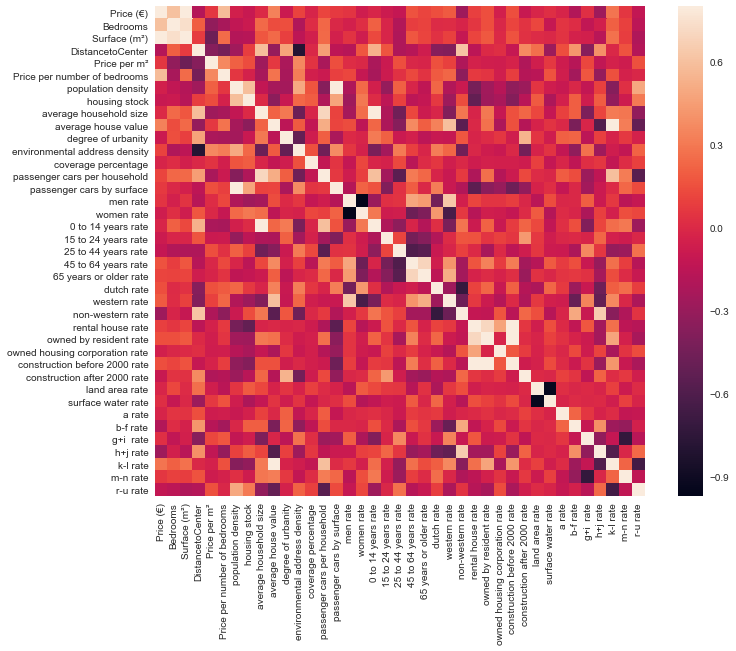

In [60]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

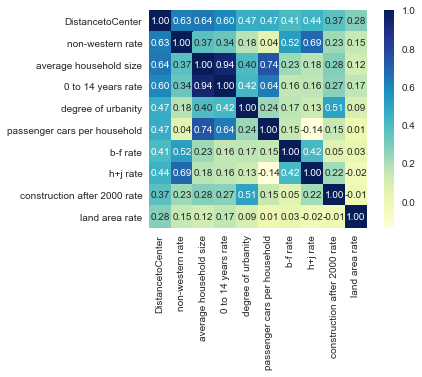

In [61]:
#heatmap correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'DistancetoCenter')['DistancetoCenter'].index
cm = np.corrcoef(DATAnorm[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},cmap="YlGnBu", yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [62]:
cols

Index(['DistancetoCenter', 'non-western rate', 'average household size',
       '0 to 14 years rate', 'degree of urbanity',
       'passenger cars per household', 'b-f rate', 'h+j rate',
       'construction after 2000 rate', 'land area rate'],
      dtype='object')

In [63]:
datax=DATA.dropna(subset = ['Price (€)', 'Surface (m²)', 'Bedrooms', 'Price per number of bedrooms','average house value','k-l financial services real estate'])
corrmatx = datax.corr()
datax.shape

(1480, 98)

In [64]:
k = 9 #number of variables for heatmap
cols = corrmat.nsmallest(9, 'DistancetoCenter')['DistancetoCenter'].index

In [65]:
cols

Index(['environmental address density', 'Price per number of bedrooms',
       'western rate', 'Price per m²', 'dutch rate', 'g+i  rate',
       'average house value', 'surface water rate', 'population density'],
      dtype='object')

In [66]:
cols=cols.insert(0, 'DistancetoCenter')

In [67]:
cols

Index(['DistancetoCenter', 'environmental address density',
       'Price per number of bedrooms', 'western rate', 'Price per m²',
       'dutch rate', 'g+i  rate', 'average house value', 'surface water rate',
       'population density'],
      dtype='object')

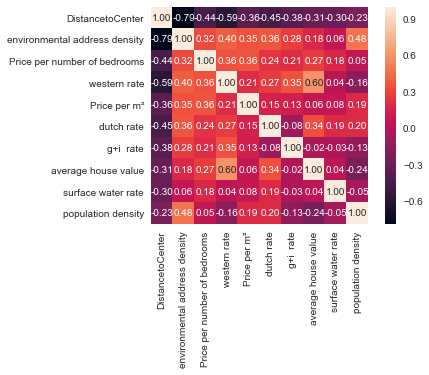

In [68]:

cm = np.corrcoef(DATAnorm[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [69]:
#more correlation plots are created for all model metrics

## 3. Spatial Analysis

In [70]:
DATA.columns

Index(['AdName', 'Zipcode', 'Area', 'Description', 'Surface (m²)', 'Bedrooms',
       'Furniture', 'Price (€)', 'Monthly', 'encryption', 'Site', 'Lat', 'Lon',
       'newLat', 'newLon', 'Price per m²', 'Price per number of bedrooms',
       'regioncode', 'regionnumber', 'region indication', 'municipal name',
       'type of region',
       'classification change neighborhoods and neighborhoods',
       'number of inhabitants', 'men', 'women', '0 to 14 years',
       '15 to 24 years', '25 to 44 years', '45 to 64 years',
       '65 years or older', 'unmarried', 'married', 'divorced', 'widowed',
       'western total', 'non-western total', 'morocco',
       'netherlands antilles and aruba', 'suriname', 'turkey',
       'other non-western', 'households total', 'single-person households',
       'households without children', 'households with children',
       'average household size', 'population density', 'housing stock',
       'average house value', 'percentage of single-family dwelling

In [71]:
RentalData.Site.unique()

array(['Paraius', 'ExpatRental'], dtype=object)

In [72]:

RentalData[RentalData.Site=='Paraius'][['newLon','newLat','Lat', 'Lon']].isna().sum()


newLon    1230
newLat    1230
Lat       1230
Lon       1230
dtype: int64

In [73]:
#DATA.dropna(subset = ['Lon','Lat'],inplace=True)

In [74]:
RentalData.newLon

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10                NaN
11                NaN
12                NaN
13                NaN
14                NaN
15                NaN
16                NaN
17                NaN
18                NaN
19                NaN
20                NaN
21                NaN
22                NaN
23                NaN
24                NaN
25                NaN
26                NaN
27                NaN
28                NaN
29                NaN
            ...      
2206    124568.659704
2207    118252.382098
2209    121078.860624
2212    124640.704769
2213    122368.704704
2220    114385.880201
2221    124386.196497
2222    119338.949652
2223    120520.411601
2228    121902.444413
2229    121936.860458
2233    120583.541503
2241    119963.071901
2242    119021.866138
2248    11

In [75]:
DATA.shape

(1552, 98)

## 3.1 Shape Files

In [76]:
#import shape files for plotting
from dbfread import DBF
import shapefile
import matplotlib.patches as mpatches
#import tilemapbase

myshp = open("C:/Users/Deniz/Desktop/TezDrive/Thesis/DataFiles/Shapefiles/buurt_2017/buurt_2017.shp", "rb")
mydbf = open("C:/Users/Deniz/Desktop/TezDrive/Thesis/DataFiles/Shapefiles/buurt_2017/buurt_2017.dbf", "rb")
r = shapefile.Reader(shp=myshp, dbf=mydbf)

In [77]:
records= r.records()
shapes = r.shapes()
print(len(shapes),len(records))

13308 13308


In [78]:
DATA.dropna(subset = ['Area'],inplace=True)
DATA = DATA.reset_index(drop=True)
DATA['Area'] = DATA['Area'].astype('category')
DATA['Area_idx'] = DATA['Area'].cat.codes
X=DATA['Area_idx']

In [79]:
dataindex=DATA.encryption.tolist()

In [80]:
records

[['BU00030000',
  'Appingedam-Centrum',
  'WK000300',
  'GM0003',
  'Appingedam',
  1,
  'NEE',
  '9901',
  1,
  1190,
  3,
  2335,
  1090,
  1245,
  10,
  9,
  21,
  30,
  30,
  40,
  36,
  11,
  12,
  2774,
  1310,
  54,
  28,
  18,
  1.7,
  6,
  4,
  0,
  1,
  0,
  1,
  2,
  90,
  84,
  5],
 ['BU00030001',
  'Appingedam-West',
  'WK000300',
  'GM0003',
  'Appingedam',
  1,
  'NEE',
  '9903',
  5,
  894,
  4,
  3080,
  1535,
  1545,
  17,
  11,
  20,
  33,
  19,
  43,
  47,
  7,
  4,
  1950,
  1335,
  27,
  37,
  36,
  2.3,
  6,
  3,
  0,
  1,
  0,
  1,
  1,
  163,
  158,
  5],
 ['BU00030002',
  'Appingedam-Oost',
  'WK000300',
  'GM0003',
  'Appingedam',
  1,
  'NEE',
  '9902',
  1,
  1112,
  3,
  5955,
  2865,
  3090,
  16,
  11,
  22,
  27,
  25,
  43,
  41,
  9,
  8,
  2094,
  2735,
  35,
  31,
  34,
  2.1,
  9,
  9,
  1,
  1,
  1,
  4,
  3,
  295,
  284,
  11],
 ['BU00030007',
  'Verspreide huizen Damsterdiep en Eemskanaal',
  'WK000300',
  'GM0003',
  'Appingedam',
  1,
  'NEE'

In [81]:
records[records[][4]=='Amsterdam']

SyntaxError: invalid syntax (<ipython-input-81-7af7476a7007>, line 1)

## 3.2 First MAP

<Figure size 1440x1440 with 0 Axes>

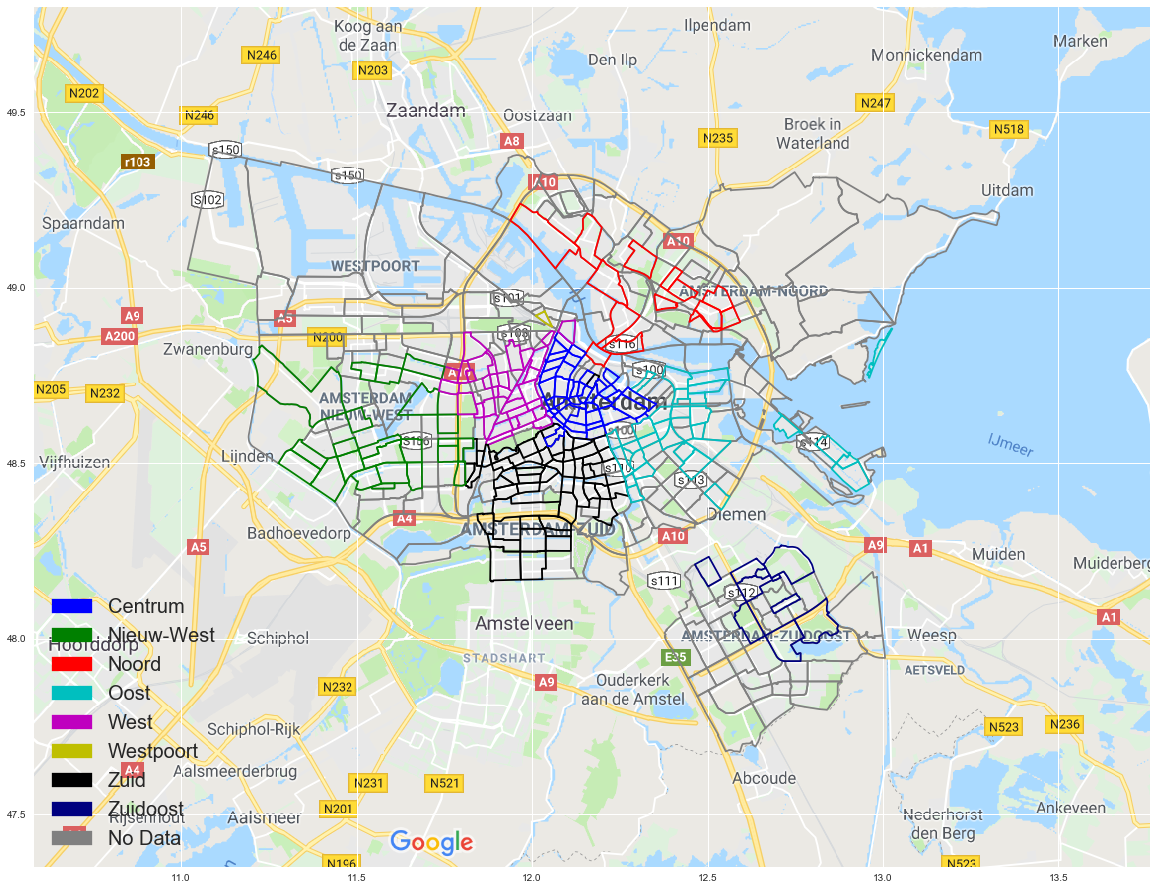

In [82]:
#final first map
import imageio
im = imageio.imread('amsterdambigger.png')
plt.figure(figsize=(20,20))
fig, ax = plt.subplots()
ax.imshow(im,extent=[10.58, 13.76, 47.35, 49.8])#,aspect='auto')


blue_patch = mpatches.Patch(color='b', label='Centrum')
green_patch = mpatches.Patch(color='g', label='Nieuw-West')
red_patch = mpatches.Patch(color='r', label='Noord')
cyan_patch = mpatches.Patch(color='c', label='Oost')
magenta_patch=mpatches.Patch(color='m', label='West')
yellow_patch=mpatches.Patch(color='y', label='Westpoort')
black_patch=mpatches.Patch(color='k', label='Zuid')
navy_patch=mpatches.Patch(color='navy', label='Zuidoost')
white_patch=mpatches.Patch(color='gray', label='No Data')


plt.legend(handles=[blue_patch,green_patch,red_patch,cyan_patch,magenta_patch,yellow_patch,black_patch,navy_patch,white_patch],prop={'size': 20})

#####

num=0
records=r.records()
#shapes = r.shapes()
#print(len(shapes),len(records))

for i in range(len(shapes)):
    if  ((records[i][4]=='Amsterdam')): #and (records[i][0]in dataindex)):    
        shape=r.shape(i)
        npoints=len(shape.points) # total points
        nparts = len(shape.parts) # total parts
        if (records[i][0]in dataindex):
            xi=dataindex.index(records[i][0])

            num=num+1
            if num>500:  #if something wrong or too long...
                break

            if nparts == 1:
                x_lon = np.zeros((len(shape.points),1))
                y_lat = np.zeros((len(shape.points),1))
                for ip in range(len(shape.points)):
                    x_lon[ip] = shape.points[ip][0]
                    y_lat[ip] = shape.points[ip][1]

                if X[xi]==0: 
                    plt.plot(x_lon/10000,y_lat/10000,'b', zorder=10)
                if X[xi]==1: 
                    plt.plot(x_lon/10000,y_lat/10000,'g', zorder=10)
                if X[xi]==2: 
                    plt.plot(x_lon/10000,y_lat/10000,'r', zorder=10)
                if X[xi]==3: 
                    plt.plot(x_lon/10000,y_lat/10000,'c', zorder=10)
                if X[xi]==4: 
                    plt.plot(x_lon/10000,y_lat/10000,'m', zorder=10)
                if X[xi]==5: 
                    plt.plot(x_lon/10000,y_lat/10000,'y', zorder=10)
                if X[xi]==6: 
                    plt.plot(x_lon/10000,y_lat/10000,'k', zorder=10)
                if X[xi]==7: 
                    plt.plot(x_lon/10000,y_lat/10000,'navy', zorder=10)


            else: # loop over parts of each shape, plot separately
                for ip in range(nparts): # loop over parts, plot separately
                    i0=shape.parts[ip]
                    if ip < nparts-1:
                        i1 = shape.parts[ip+1]-1
                    else:
                        i1 = npoints

                seg=shape.points[i0:i1+1]
                x_lon = np.zeros((len(seg),1))
                y_lat = np.zeros((len(seg),1))
                for ip in range(len(seg)):
                    x_lon[ip] = seg[ip][0]
                    y_lat[ip] = seg[ip][1]

                if X[xi]==0: 
                    plt.plot(x_lon/10000,y_lat/10000,'b', zorder=10)
                if X[xi]==1: 
                    plt.plot(x_lon/10000,y_lat/10000,'g', zorder=10)
                if X[xi]==2: 
                    plt.plot(x_lon/10000,y_lat/10000,'r', zorder=10)
                if X[xi]==3: 
                    plt.plot(x_lon/10000,y_lat/10000,'c', zorder=10)
                if X[xi]==4: 
                    plt.plot(x_lon/10000,y_lat/10000,'m', zorder=10)
                if X[xi]==5: 
                    plt.plot(x_lon/10000,y_lat/10000,'y', zorder=10)
                if X[xi]==6: 
                    plt.plot(x_lon/10000,y_lat/10000,'k', zorder=10)
                if X[xi]==7: 
                    plt.plot(x_lon/10000,y_lat/10000,'navy', zorder=10)
            
        else:
            if nparts == 1:
                x_lon = np.zeros((len(shape.points),1))
                y_lat = np.zeros((len(shape.points),1))
                for ij in range(len(shape.points)):
                    x_lon[ij] = shape.points[ij][0]
                    y_lat[ij] = shape.points[ij][1]

                plt.plot(x_lon/10000,y_lat/10000,'gray', zorder=1)
                    
            else: # loop over parts of each shape, plot separately
                for ij in range(nparts): # loop over parts, plot separately
                    i0=shape.parts[ij]
                    if ij < nparts-1:
                        i1 = shape.parts[ij+1]-1
                    else:
                        i1 = npoints

                seg=shape.points[i0:i1+1]
                x_lon = np.zeros((len(seg),1))
                y_lat = np.zeros((len(seg),1))
                for ij in range(len(seg)):
                    x_lon[ij] = seg[ij][0]
                    y_lat[ij] = seg[ij][1]
                    
                plt.plot(x_lon/10000,y_lat/10000,'gray', zorder=1)
        

#plt.imshow(im,zorder=0.1)

#for i in range(len(RentalData['newLat'])):
#    plt.plot(DATA['newLon'][i]/10000,DATA['newLat'][i]/10000, 'ro')
        
        

#plt.xlim(-130,-60)
#plt.ylim(23,50)
plt.gcf().set_size_inches(20, 20)
plt.show()

## 3.3 Spatial Analysis of simple price metrics

In [83]:
#'Price per m²'
#Price per number of bedrooms

In [84]:
A=DATA.groupby(['Area'])['Price per m²'].mean()
my_new3_list = [i *92.7 for i in A]
my_new3_list

[2517.0777019277084,
 1866.337572136374,
 1925.2833771512423,
 1952.2709195880307,
 2422.9261898311897,
 2397.1988612906407,
 2339.167217615813,
 1738.550275607943]

In [85]:
DATA.groupby(['Area'])['Price per number of bedrooms'].describe()

count        mean         std     min         25%  \
Area                                                                      
Stadsdeel Centrum     549.0  856.420310  231.128914  350.00  716.666667   
Stadsdeel Nieuw-West   87.0  597.486590  166.723652  275.00  467.083333   
Stadsdeel Noord        37.0  568.148649  172.592172  373.75  480.000000   
Stadsdeel Oost        118.0  617.366525  136.107402  350.00  533.333333   
Stadsdeel West        206.0  738.352809  188.935395  412.50  616.666667   
Stadsdeel Westpoort     9.0  906.944444  264.632541  500.00  700.000000   
Stadsdeel Zuid        466.0  763.235137  216.322266  325.00  616.666667   
Stadsdeel Zuidoost     29.0  487.500000  103.856443  325.00  400.000000   

                             50%      75%          max  
Area                                                    
Stadsdeel Centrum     825.000000  950.000  1999.500000  
Stadsdeel Nieuw-West  566.666667  725.000  1200.000000  
Stadsdeel Noord       500.000000  635.000  1150.000000  
Stadsdeel Oost        583.333333  686.875  1166.666667  
Stadsdeel West        725.000000  825.000  1750.000000  
Stadsdeel Westpoort   962.500000  962.500  1283.333333  
Stadsdeel Zuid        750.000000  847.500  1999.500000  
Stadsdeel Zuidoost    498.333333  597.500   625.000000

<Figure size 1440x1440 with 0 Axes>

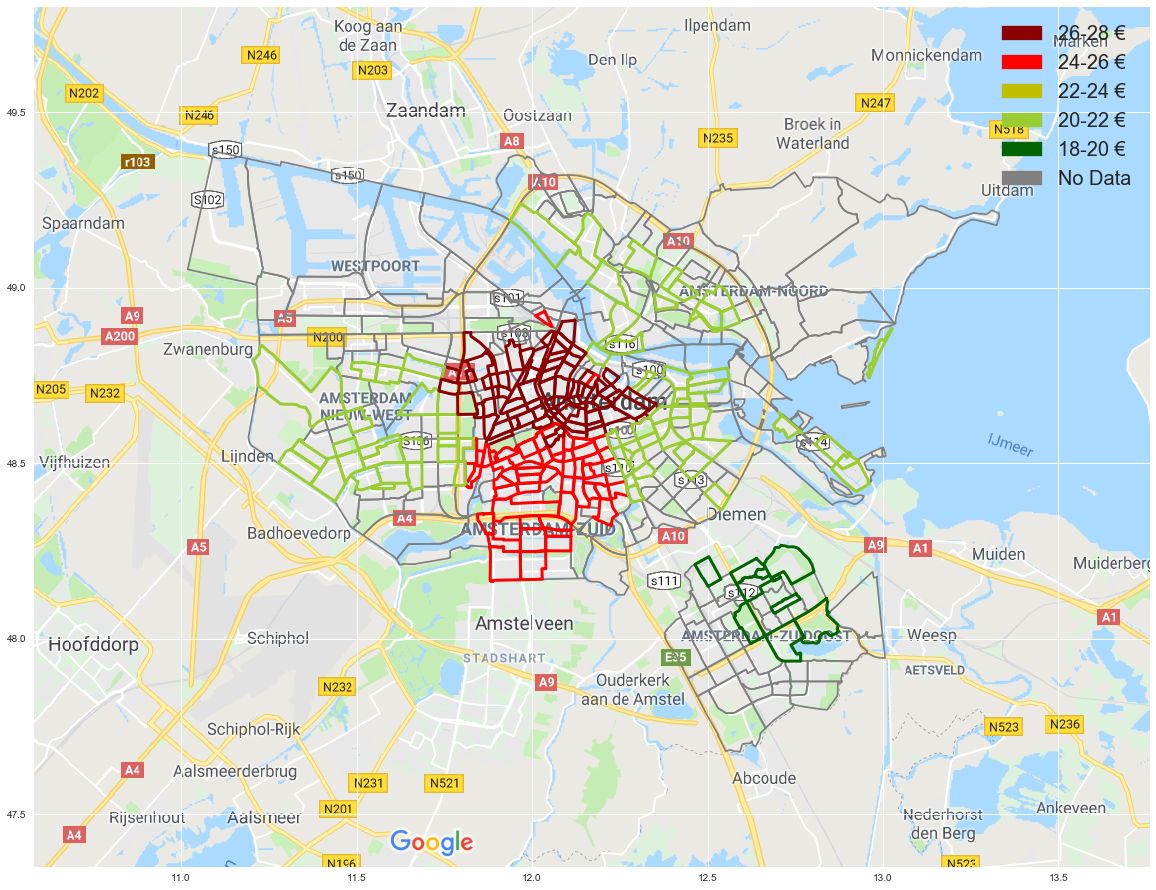

In [86]:
#'Price per number of bedrooms graph

import imageio
im = imageio.imread('amsterdambigger.png')
plt.figure(figsize=(20,20))
fig, ax = plt.subplots()
ax.imshow(im,extent=[10.58, 13.76, 47.35, 49.8])#,aspect='auto')

darkred_patch = mpatches.Patch(color='darkred', label='26-28 €')
red_patch = mpatches.Patch(color='r', label='24-26 €')
yellow_patch = mpatches.Patch(color='y', label='22-24 €')
green_patch = mpatches.Patch(color='yellowgreen', label='20-22 €')
darkgreen_patch=mpatches.Patch(color='darkgreen', label='18-20 €')
gray_patch=mpatches.Patch(color='gray', label='No Data')

plt.legend(handles=[darkred_patch,red_patch,yellow_patch,green_patch,darkgreen_patch,gray_patch],prop={'size': 20})

#####

num=0
records=r.records()
#shapes = r.shapes()
#print(len(shapes),len(records))

for i in range(len(shapes)):
    if  ((records[i][4]=='Amsterdam')): #and (records[i][0]in dataindex)):    
        shape=r.shape(i)
        npoints=len(shape.points) # total points
        nparts = len(shape.parts) # total parts
        if (records[i][0]in dataindex):
            xi=dataindex.index(records[i][0])

            num=num+1
            if num>500:  #if something wrong or too long...
                break

            if nparts == 1:
                x_lon = np.zeros((len(shape.points),1))
                y_lat = np.zeros((len(shape.points),1))
                for ip in range(len(shape.points)):
                    x_lon[ip] = shape.points[ip][0]
                    y_lat[ip] = shape.points[ip][1]

                if X[xi]==0: 
                    plt.plot(x_lon/10000,y_lat/10000,'darkred', linewidth=3)
                if X[xi]==1: 
                    plt.plot(x_lon/10000,y_lat/10000,'yellowgreen', linewidth=3)
                if X[xi]==2: 
                    plt.plot(x_lon/10000,y_lat/10000,'yellowgreen', linewidth=3)
                if X[xi]==3: 
                    plt.plot(x_lon/10000,y_lat/10000,'yellowgreen', linewidth=3)
                if X[xi]==4: 
                    plt.plot(x_lon/10000,y_lat/10000,'darkred', linewidth=3)
                if X[xi]==5: 
                    plt.plot(x_lon/10000,y_lat/10000,'r', linewidth=3)
                if X[xi]==6: 
                    plt.plot(x_lon/10000,y_lat/10000,'r',linewidth=3)
                if X[xi]==7: 
                    plt.plot(x_lon/10000,y_lat/10000,'darkgreen', linewidth=3)


            else: # loop over parts of each shape, plot separately
                for ip in range(nparts): # loop over parts, plot separately
                    i0=shape.parts[ip]
                    if ip < nparts-1:
                        i1 = shape.parts[ip+1]-1
                    else:
                        i1 = npoints

                seg=shape.points[i0:i1+1]
                x_lon = np.zeros((len(seg),1))
                y_lat = np.zeros((len(seg),1))
                for ip in range(len(seg)):
                    x_lon[ip] = seg[ip][0]
                    y_lat[ip] = seg[ip][1]

                if X[xi]==0: 
                    plt.plot(x_lon/10000,y_lat/10000,'darkred', linewidth=3)
                if X[xi]==1: 
                    plt.plot(x_lon/10000,y_lat/10000,'yellowgreen', linewidth=3)
                if X[xi]==2: 
                    plt.plot(x_lon/10000,y_lat/10000,'yellowgreen', linewidth=3)
                if X[xi]==3: 
                    plt.plot(x_lon/10000,y_lat/10000,'yellowgreen', linewidth=3)
                if X[xi]==4: 
                    plt.plot(x_lon/10000,y_lat/10000,'darkred', linewidth=3)
                if X[xi]==5: 
                    plt.plot(x_lon/10000,y_lat/10000,'r', linewidth=3)
                if X[xi]==6: 
                    plt.plot(x_lon/10000,y_lat/10000,'r', linewidth=3)
                if X[xi]==7: 
                    plt.plot(x_lon/10000,y_lat/10000,'darkgreen', linewidth=3)
            
        else:
            if nparts == 1:
                x_lon = np.zeros((len(shape.points),1))
                y_lat = np.zeros((len(shape.points),1))
                for ij in range(len(shape.points)):
                    x_lon[ij] = shape.points[ij][0]
                    y_lat[ij] = shape.points[ij][1]

                plt.plot(x_lon/10000,y_lat/10000,'gray', zorder=1)
                    
            else: # loop over parts of each shape, plot separately
                for ij in range(nparts): # loop over parts, plot separately
                    i0=shape.parts[ij]
                    if ij < nparts-1:
                        i1 = shape.parts[ij+1]-1
                    else:
                        i1 = npoints

                seg=shape.points[i0:i1+1]
                x_lon = np.zeros((len(seg),1))
                y_lat = np.zeros((len(seg),1))
                for ij in range(len(seg)):
                    x_lon[ij] = seg[ij][0]
                    y_lat[ij] = seg[ij][1]
                    
                plt.plot(x_lon/10000,y_lat/10000,'gray', zorder=1)
#plt.imshow(im,zorder=0.1)

#for i in range(len(RentalData['newLat'])):
#    plt.plot(DATA['newLon'][i]/10000,DATA['newLat'][i]/10000, 'ro')
        
        

#plt.xlim(-130,-60)
#plt.ylim(23,50)
plt.gcf().set_size_inches(20, 20)
plt.show()

In [87]:
DATA.groupby(['Area'])['Price per number of bedrooms'].describe()

count        mean         std     min         25%  \
Area                                                                      
Stadsdeel Centrum     549.0  856.420310  231.128914  350.00  716.666667   
Stadsdeel Nieuw-West   87.0  597.486590  166.723652  275.00  467.083333   
Stadsdeel Noord        37.0  568.148649  172.592172  373.75  480.000000   
Stadsdeel Oost        118.0  617.366525  136.107402  350.00  533.333333   
Stadsdeel West        206.0  738.352809  188.935395  412.50  616.666667   
Stadsdeel Westpoort     9.0  906.944444  264.632541  500.00  700.000000   
Stadsdeel Zuid        466.0  763.235137  216.322266  325.00  616.666667   
Stadsdeel Zuidoost     29.0  487.500000  103.856443  325.00  400.000000   

                             50%      75%          max  
Area                                                    
Stadsdeel Centrum     825.000000  950.000  1999.500000  
Stadsdeel Nieuw-West  566.666667  725.000  1200.000000  
Stadsdeel Noord       500.000000  635.000  1150.000000  
Stadsdeel Oost        583.333333  686.875  1166.666667  
Stadsdeel West        725.000000  825.000  1750.000000  
Stadsdeel Westpoort   962.500000  962.500  1283.333333  
Stadsdeel Zuid        750.000000  847.500  1999.500000  
Stadsdeel Zuidoost    498.333333  597.500   625.000000

<Figure size 1440x1440 with 0 Axes>

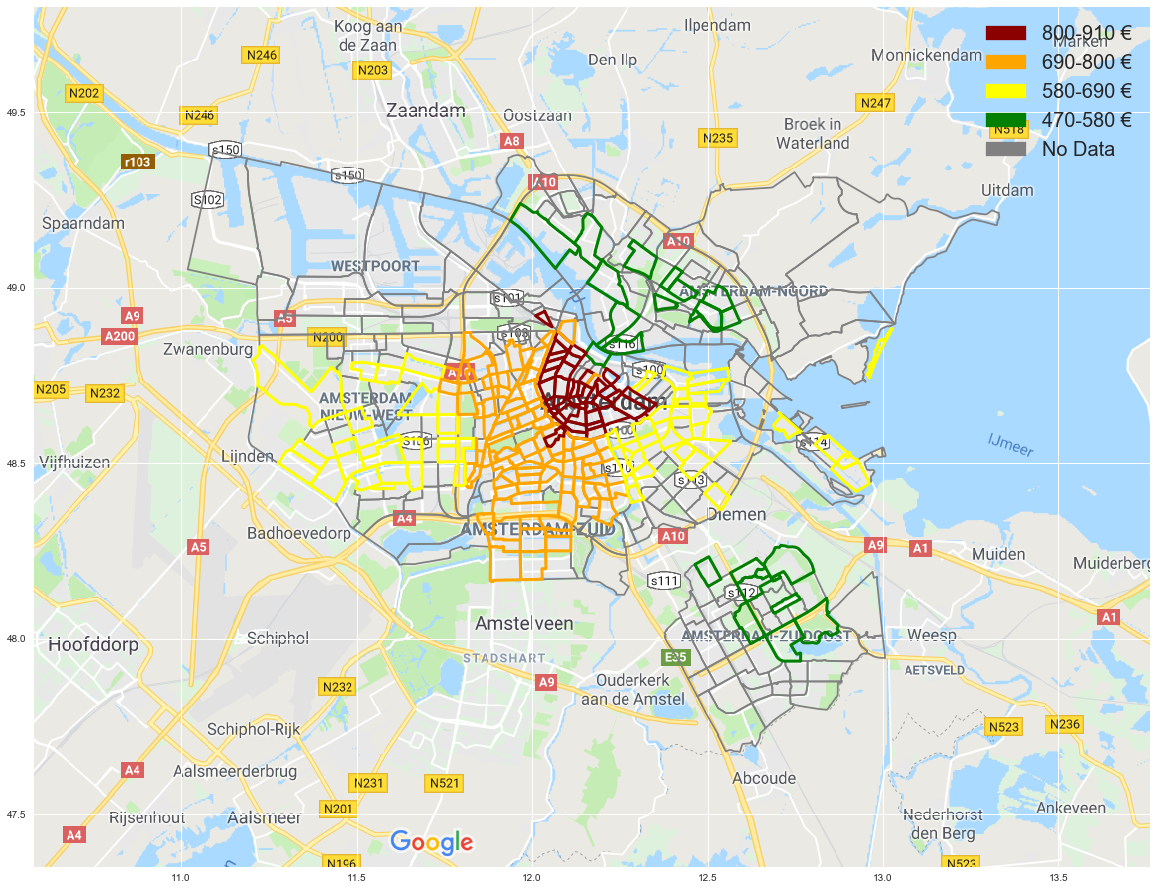

In [88]:
#'Price per number of bedrooms graph

import imageio
im = imageio.imread('amsterdambigger.png')
plt.figure(figsize=(20,20))
fig, ax = plt.subplots()
ax.imshow(im,extent=[10.58, 13.76, 47.35, 49.8])#,aspect='auto')

darkred_patch = mpatches.Patch(color='darkred', label='800-910 €')
orange_patch = mpatches.Patch(color='orange', label='690-800 €')
yellow_patch = mpatches.Patch(color='yellow', label='580-690 €')
green_patch = mpatches.Patch(color='green', label='470-580 €')
gray_patch=mpatches.Patch(color='gray', label='No Data')


plt.legend(handles=[darkred_patch,orange_patch,yellow_patch,green_patch,gray_patch],prop={'size': 20})

#####

num=0
records=r.records()
#shapes = r.shapes()
#print(len(shapes),len(records))

for i in range(len(shapes)):
    if  ((records[i][4]=='Amsterdam')): #and (records[i][0]in dataindex)):    
        shape=r.shape(i)
        npoints=len(shape.points) # total points
        nparts = len(shape.parts) # total parts
        if (records[i][0]in dataindex):
            xi=dataindex.index(records[i][0])

            num=num+1
            if num>500:  #if something wrong or too long...
                break

            if nparts == 1:
                x_lon = np.zeros((len(shape.points),1))
                y_lat = np.zeros((len(shape.points),1))
                for ip in range(len(shape.points)):
                    x_lon[ip] = shape.points[ip][0]
                    y_lat[ip] = shape.points[ip][1]

                if X[xi]==0: 
                    plt.plot(x_lon/10000,y_lat/10000,'darkred', linewidth=3)
                if X[xi]==1: 
                    plt.plot(x_lon/10000,y_lat/10000,'yellow', linewidth=3)
                if X[xi]==2: 
                    plt.plot(x_lon/10000,y_lat/10000,'green', linewidth=3)
                if X[xi]==3: 
                    plt.plot(x_lon/10000,y_lat/10000,'yellow', linewidth=3)
                if X[xi]==4: 
                    plt.plot(x_lon/10000,y_lat/10000,'orange', linewidth=3)
                if X[xi]==5: 
                    plt.plot(x_lon/10000,y_lat/10000,'darkred', linewidth=3)
                if X[xi]==6: 
                    plt.plot(x_lon/10000,y_lat/10000,'orange',linewidth=3)
                if X[xi]==7: 
                    plt.plot(x_lon/10000,y_lat/10000,'green', linewidth=3)


            else: # loop over parts of each shape, plot separately
                for ip in range(nparts): # loop over parts, plot separately
                    i0=shape.parts[ip]
                    if ip < nparts-1:
                        i1 = shape.parts[ip+1]-1
                    else:
                        i1 = npoints

                seg=shape.points[i0:i1+1]
                x_lon = np.zeros((len(seg),1))
                y_lat = np.zeros((len(seg),1))
                for ip in range(len(seg)):
                    x_lon[ip] = seg[ip][0]
                    y_lat[ip] = seg[ip][1]

                if X[xi]==0: 
                    plt.plot(x_lon/10000,y_lat/10000,'darkred', linewidth=3)
                if X[xi]==1: 
                    plt.plot(x_lon/10000,y_lat/10000,'yellow', linewidth=3)
                if X[xi]==2: 
                    plt.plot(x_lon/10000,y_lat/10000,'green', linewidth=3)
                if X[xi]==3: 
                    plt.plot(x_lon/10000,y_lat/10000,'yellow', linewidth=3)
                if X[xi]==4: 
                    plt.plot(x_lon/10000,y_lat/10000,'orange', linewidth=3)
                if X[xi]==5: 
                    plt.plot(x_lon/10000,y_lat/10000,'darkred', linewidth=3)
                if X[xi]==6: 
                    plt.plot(x_lon/10000,y_lat/10000,'orange', linewidth=3)
                if X[xi]==7: 
                    plt.plot(x_lon/10000,y_lat/10000,'green', linewidth=3)
            
        else:
            if nparts == 1:
                x_lon = np.zeros((len(shape.points),1))
                y_lat = np.zeros((len(shape.points),1))
                for ij in range(len(shape.points)):
                    x_lon[ij] = shape.points[ij][0]
                    y_lat[ij] = shape.points[ij][1]

                plt.plot(x_lon/10000,y_lat/10000,'gray', zorder=1)
                    
            else: # loop over parts of each shape, plot separately
                for ij in range(nparts): # loop over parts, plot separately
                    i0=shape.parts[ij]
                    if ij < nparts-1:
                        i1 = shape.parts[ij+1]-1
                    else:
                        i1 = npoints

                seg=shape.points[i0:i1+1]
                x_lon = np.zeros((len(seg),1))
                y_lat = np.zeros((len(seg),1))
                for ij in range(len(seg)):
                    x_lon[ij] = seg[ij][0]
                    y_lat[ij] = seg[ij][1]
                    
                plt.plot(x_lon/10000,y_lat/10000,'gray')
        
plt.gcf().set_size_inches(20, 20)
plt.show()